<a href="https://colab.research.google.com/github/kuanysh-zhaksylyk/ml_training/blob/main/ML_SELFEDU_TRAINING18_GAUSS_BAYESS_CLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0


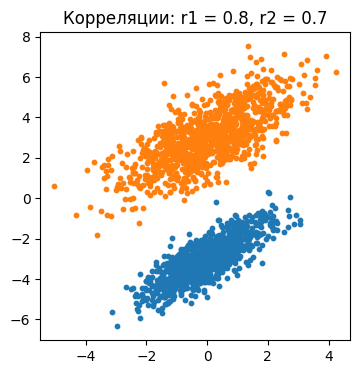

In [ ]:
# Гауссовский байесовский классификатор

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# исходные параметры распределений двух классов
r1 = 0.8
D1 = 1.0
mean1 = [0, -3]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.7
D2 = 2.0
mean2 = [0, 3]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

# моделирование обучающей выборки
N = 1000
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T

# вычисление оценок МО и ковариационных матриц
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

# модель гауссовского байесовского классификатора
Py1, L1 = 0.5, 1  # вероятности появления классов
Py2, L2 = 1 - Py1, 1  # и величины штрафов неверной классификации

b = lambda x, v, m, l, py: np.log(l * py) - 0.5 * (x - m) @ np.linalg.inv(v) @ (x - m).T - 0.5 * np.log(
    np.linalg.det(v))

x = np.array([0, -4])  # входной вектор в формате (x, y)
a = np.argmax([b(x, VV1, mm1, L1, Py1), b(x, VV2, mm2, L2, Py2)])  # классификатор
print(a)

# вывод графиков
plt.figure(figsize=(4, 4))
plt.title(f"Корреляции: r1 = {r1}, r2 = {r2}")
plt.scatter(x1[0], x1[1], s=10)
plt.scatter(x2[0], x2[1], s=10)
plt.show()

In [2]:
from sklearn.metrics import precision_score, recall_score, f1_score, ndcg_score

# Пример истинных ранжированных релевантностей
true_rankings = [3, 2, 1, 0]

# Пример предсказанных ранжированных релевантностей
predicted_rankings = [5, 1, 3, 0]

# Метрики точности (precision), полноты (recall) и F1-мера (F1-score)
precision = precision_score(true_rankings, predicted_rankings, average='micro')
recall = recall_score(true_rankings, predicted_rankings, average='micro')
f1_score = f1_score(true_rankings, predicted_rankings, average='micro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

# NDCG (Normalized Discounted Cumulative Gain)
ndcg = ndcg_score([true_rankings], [predicted_rankings])
print("NDCG:", ndcg)


Precision: 0.25
Recall: 0.25
F1-score: 0.25
NDCG: 0.9725044904464194
